In [3]:
import pandas as pd
import numpy as np

In [7]:
def centroids(df,value):
    
    ## df description
    ## 1st dimension year
    ## 2nd dimension lat
    ## 3rd dimension lon
    ## 4th value

    df["transformed"] = 1
    df.
    for lat in df["lat"].unique():
        for lon in df["lon"].unique():
            temp = (df["lat"] == lat) & (df["lon"] == lon)
            dfmax = df[value][temp].max()
            dfmin = df[value][temp].min()
            for time in df["time"].unique():
                if dfmax != dfmin:
                    temp2 = (df["time"] == time) & (temp)
                    df.loc[:,"transformed"][temp2] = (df[value][ temp2 ] - dfmin)/(dfmax - dfmin)
    coordx=[]
    coordy=[]
    for time in df["time"].unique():
        temp = df["time"] == time
        coordx.append(np.dot(df["transformed"][temp],df["lon"][temp])/df["transformed"][temp].sum())
        coordy.append(np.dot(df["transformed"][temp],df["lat"][temp])/df["transformed"][temp].sum())
        
    return coordx,coordy

In [8]:
data = pd.read_csv("/mnt/d/UGP/datasets/data.csv",index_col="Unnamed: 0").drop(columns=["sla","enso"])

In [9]:
x,y = centroids(data,"precip")

/home/rghoshal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [10]:
x,y

([68.80228172038674,
  66.02064071728705,
  74.59826557861805,
  70.37422008711883,
  77.5062757812162,
  81.58963413006298,
  86.27188585925643,
  86.35732553850552,
  84.72403579768898,
  79.87324992456037,
  73.40247492693474,
  75.75898548082667,
  70.04564245936606,
  73.20999844830982,
  74.64998711949812,
  76.1780900939841,
  77.87938578273477,
  84.67621205827706,
  84.6541736360747,
  84.94462782934335,
  85.04862880721461,
  78.19961525191657,
  70.65534234716613,
  69.9499239154708,
  75.24182978408443,
  71.46448515414663,
  66.63506293521459,
  69.03818120250303,
  80.55411331802367,
  83.71461070358099,
  84.87653314975095,
  86.7517110848698,
  85.46018420415086,
  80.00075472041208,
  82.21576978165544,
  67.88465268033329,
  67.49473641290285,
  71.4297188772976,
  68.16558540777194,
  75.67335613754173,
  78.21058067063007,
  80.1145904019645,
  86.6336085809361,
  86.23894838186818,
  85.92713327849091,
  82.95537948136918,
  80.0584279987562,
  76.16840002935723,
 

In [11]:
data

,time,lat,lon,precip,transformed
0,1993-01-15,-1.25,43.75,1.647459,0.245331
1,1993-01-15,-1.25,46.25,2.560627,0.276800
2,1993-01-15,-1.25,48.75,2.937700,0.282438
3,1993-01-15,-1.25,51.25,3.374984,0.332851
4,1993-01-15,-1.25,53.75,3.629688,0.336805
5,1993-01-15,-1.25,56.25,6.321443,0.568088
6,1993-01-15,-1.25,58.75,9.843208,0.780795
7,1993-01-15,-1.25,61.25,9.929490,0.680231
8,1993-01-15,-1.25,63.75,7.180682,0.568804
9,1993-01-15,-1.25,66.25,7.540880,0.633462


In [1]:
import cartopy.feature as cfeat
import cartopy.crs as ccrs
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
x,y = ([68.80228172038674,
  66.02064071728705,
  74.59826557861805,
  70.37422008711883,
  77.5062757812162,
  81.58963413006298,
  86.27188585925643,
  86.35732553850552,
  84.72403579768898,
  79.87324992456037,
  73.40247492693474,
  75.75898548082667,
  70.04564245936606,
  73.20999844830982,
  74.64998711949812,
  76.1780900939841,
  77.87938578273477,
  84.67621205827706,
  84.6541736360747,
  84.94462782934335,
  85.04862880721461,
  78.19961525191657,
  70.65534234716613,
  69.9499239154708,
  75.24182978408443,
  71.46448515414663,
  66.63506293521459,
  69.03818120250303,
  80.55411331802367,
  83.71461070358099,
  84.87653314975095,
  86.7517110848698,
  85.46018420415086,
  80.00075472041208,
  82.21576978165544,
  67.88465268033329,
  67.49473641290285,
  71.4297188772976,
  68.16558540777194,
  75.67335613754173,
  78.21058067063007,
  80.1145904019645,
  86.6336085809361,
  86.23894838186818,
  85.92713327849091,
  82.95537948136918,
  80.0584279987562,
  76.16840002935723,
  65.87508872865962,
  73.07849879969145,
  65.10142732798035,
  72.30501591128298,
  78.37807049976195,
  80.53955396839153,
  85.28249826710888,
  85.62182272722593,
  84.4360465953788,
  71.17823468522207,
  68.68114085344915,
  68.80540305901111,
  63.684294702811194,
  67.93538083580297,
  67.98628705178808,
  73.6069630250409,
  78.88647180312746,
  83.77946470542734,
  85.88031307883932,
  86.10818440117974,
  84.99343996437236,
  82.47826728912167,
  79.98627315688992,
  78.14919941429882,
  72.65662923482141,
  68.6465673918252,
  71.35977585875261,
  79.37215262456665,
  81.71215592628145,
  85.97970597532859,
  84.1759784706959,
  85.87620820943296,
  84.68743867676744,
  80.47497510690324,
  74.72794917787115,
  74.1289077748923,
  71.32017640092103,
  76.50214709102187,
  78.19249646114973,
  82.07211038051051,
  80.92813227619874,
  86.03249043221993,
  85.81568553737618,
  87.01664933453156,
  83.49720030236846,
  81.19557390359019,
  76.19492922007751,
  72.18227403563927,
  76.89762171288707,
  73.49888919938344,
  72.08150487970876,
  77.31567584697076,
  80.4191000999529,
  86.01254575012604,
  84.50202840262558,
  86.53136793604503,
  86.66906195819085,
  82.31286441406499,
  76.82979572270872,
  69.85034291044812,
  71.71358614315561,
  68.94111105673119,
  71.60850622167894,
  69.91782718489323,
  81.32630063525129,
  82.81782897469463,
  86.80765339080435,
  85.13815307689403,
  84.499297812484,
  78.77207548057586,
  78.81053992844748,
  72.19034452162657,
  74.23741696326137,
  71.2230531564139,
  71.36776207513225,
  70.33579163353895,
  80.78749094906905,
  80.7869371909364,
  83.03838940085063,
  85.34246553743814,
  85.64281556842792,
  83.12164509875237,
  73.43529470686069,
  71.76898240942933,
  68.49494270893129,
  70.6941998276859,
  76.29408437897516,
  71.4183732110235,
  82.6257889056292,
  83.85240308225103,
  84.7074155580686,
  85.6314153034988,
  83.93837200720594,
  77.21727411802166,
  70.51671947487047,
  69.28816205334498,
  68.84167685696053,
  68.60144606353175,
  70.44790608154472,
  71.36784647183485,
  79.12281321478122,
  83.12496572378303,
  85.88135141761838,
  86.12058493691063,
  85.33361116426275,
  81.87500506757266,
  79.17047470383582,
  77.54989062007806,
  71.21132579038957,
  70.95359106880511,
  75.20003366690405,
  75.73659214237989,
  80.84963621689622,
  84.29292112225413,
  85.49732800774181,
  83.14176007417767,
  83.29522220628712,
  76.51793869638851,
  70.96445410972821,
  69.607809341651,
  72.96162483131998,
  70.1327357981902,
  69.88898079314396,
  74.74006689458045,
  80.81807622526546,
  80.19227305224169,
  85.8965591989582,
  85.63740509072898,
  84.98184183731328,
  83.85481704288154,
  75.401415995275,
  74.77771758791076,
  70.70273601832598,
  72.84275388836252,
  80.92476017379013,
  80.31275618672872,
  77.55590257053215,
  82.5639813797825,
  85.6160128521918,
  87.25287155345339,
  85.58167136996668,
  78.56096017592601,
  80.83143909626388,
  75.60754450050335,
  71.40102533301389,
  68.68103771145582,
  73.02572902231482,
  74.50644246059178,
  80.03184657465253,
  83.68371157480122,
  84.42213472363764,
  83.69572156393177,
  82.28719419129393,
  79.13507681897615,
  75.86923124807694,
  72.2958989580823,
  72.4206995442988,
  69.73670006029162,
  73.25522778490777,
  72.45185583898838,
  74.50917101013641,
  83.17352233364119,
  83.54733504117613,
  84.2756392609962,
  85.41368973017505,
  82.62532225780726,
  83.03585023506116,
  80.89289961581544,
  73.27796807990366,
  69.70978417280743,
  78.35522216627218,
  74.9076763634629,
  75.98592350852348,
  84.9432901376264,
  84.97265823980104,
  82.11057897293118,
  84.86449484308646,
  76.93563165003758,
  72.55019866824954,
  78.55071116529227,
  72.67852199603642,
  70.82377727874058,
  72.78382151522116,
  75.7747197512439,
  80.87778275270108,
  85.34999166307874,
  86.10733576278994,
  84.50473884421963,
  84.01940151170395,
  78.1840477634974,
  77.36442322311127,
  72.35283728734248,
  71.55093156509031,
  75.9729089601227,
  67.56829448810852,
  72.46253163026351,
  78.68585379773936,
  84.39473882963429,
  85.32698321956642,
  82.54826772239065,
  85.69062300851462,
  82.12799798016451,
  72.58801775981748,
  75.65155907138094,
  67.72311267112485,
  70.57179838010804,
  69.21512443931047,
  76.3940262847077,
  77.83468666675478,
  84.65532885285398,
  86.91619629722372,
  86.01165714700069,
  83.92429733087758,
  76.90900211229322,
  75.95319302165001,
  78.3402007560286,
  73.19625153948647,
  70.2670874261723,
  69.95747397798034,
  77.36512296871622,
  77.37701686980816,
  84.05362193693395,
  84.6902340949176,
  84.01882344801183,
  85.84636270038972,
  74.3302944351958,
  73.74254761328466,
  70.79114359766079,
  70.73745729426214,
  73.14926899831258,
  69.10635143622174,
  69.40202981892766,
  77.41663185211523,
  83.31678176562626,
  84.2613747173027,
  85.98309839953026,
  83.72273343995509,
  82.6536607204024,
  77.31418776923499,
  74.67192815228846,
  76.23093480529161,
  68.04551660021838,
  70.78057864980698,
  79.79963857095989,
  78.85612756546972,
  84.12090450163461,
  86.67514138717645,
  87.29250074043627,
  84.45739405746428,
  82.85715907082765,
  78.92907221933999,
  76.50522026035219,
  75.98781028867131,
  67.17017251595983,
  73.50329300684913,
  73.19692161963216,
  75.00574111075068,
  86.23235266917494,
  86.62118523267367,
  88.61075622296813,
  85.64489022418391,
  76.8668794703355,
  73.7887923927736,
  75.08815814065547],
 [19.880787211920257,
  29.024870911255892,
  28.212948041565852,
  24.675891382932953,
  20.69573679316398,
  22.279878196441707,
  24.121180124414344,
  23.742132488097713,
  18.59021465073216,
  14.406708870255535,
  18.875935013866773,
  14.589316178603426,
  22.406035731647258,
  24.996911944774897,
  24.153155249811608,
  21.34423548783922,
  18.20471413929537,
  21.959311205269042,
  22.871197456403422,
  21.947131938779442,
  19.24377154912931,
  15.71819511821865,
  18.42778101611815,
  20.508264084026322,
  16.068606673053,
  22.971687136891923,
  23.70029319330666,
  22.367903915701856,
  17.792953124248385,
  19.928485415528,
  23.338085068003828,
  20.64034688563764,
  20.613754205659216,
  16.897670232981085,
  13.81742147858709,
  20.570023645084333,
  21.713786102122466,
  25.13978768157264,
  25.661716553555543,
  21.411104181190225,
  21.38493188202216,
  19.298156708146426,
  23.08795644620433,
  21.21082286423165,
  19.275151737348928,
  17.335106379172885,
  14.808129754139571,
  17.863832224069796,
  30.043715625102678,
  26.161532851231474,
  26.569039036803762,
  22.168822535820286,
  19.979974421056895,
  23.177798146435375,
  21.99999306189705,
  22.01169419673522,
  18.122826721670695,
  15.547212424955747,
  17.691933070204946,
  17.209576016529482,
  21.481543817504782,
  29.400560515015318,
  28.335611073988048,
  25.74882540997746,
  20.273253215712902,
  21.137345663522837,
  22.686186115253925,
  21.28445824864619,
  18.76005264803249,
  14.923110550927007,
  15.503382205364458,
  13.386713392746374,
  18.96945313342211,
  25.173677593606374,
  24.785861534969026,
  21.667354516052296,
  20.710957920148896,
  22.47281063422006,
  23.817496788991576,
  22.09600371918186,
  20.086074266002072,
  17.119351147733163,
  19.946131356598833,
  11.560189979639135,
  22.57495508610204,
  20.850521688145275,
  21.50033650866276,
  19.813834864224436,
  20.643397651199546,
  22.416812639906798,
  22.27037970191793,
  21.490689848289133,
  17.563988769135864,
  19.021772134554844,
  15.216245045897422,
  19.587463562330058,
  17.596577725685332,
  22.357455696267383,
  23.238604214325193,
  18.542270818717043,
  19.354594220598926,
  21.78984413857098,
  21.519304769854426,
  21.430347469757105,
  18.445633806398618,
  18.76066303730105,
  16.38186109015739,
  21.129436012711817,
  21.3654856198604,
  25.71950821559849,
  25.975667788697866,
  25.12062824937712,
  22.00157223937928,
  23.108923550555993,
  22.746084303116966,
  20.555340790055784,
  18.909519477716245,
  14.15598537742582,
  13.191671543817085,
  19.770240680691618,
  19.12604103516068,
  28.978595874658556,
  27.946189856974712,
  23.216361567210345,
  23.503714718588057,
  22.567906146539652,
  23.4267308593079,
  20.690398370273865,
  19.66227151851061,
  17.394566533780658,
  18.62796878338169,
  17.351905138998752,
  22.705752320193277,
  23.95125979673449,
  27.106731819675176,
  22.119204712858522,
  21.569768425207847,
  21.642280696384695,
  22.926929753282916,
  21.797061007368608,
  15.961256498094091,
  15.007727586601986,
  17.99355693857298,
  20.704490678819166,
  22.340045734908287,
  27.757261414087527,
  26.94279948643331,
  21.81239182130569,
  21.0297072533129,
  20.727568013707806,
  22.13087600328292,
  23.43912736187676,
  18.53579413585209,
  14.647399828324087,
  15.837306418479283,
  19.314891001224513,
  23.809389831669517,
  26.191407683767956,
  23.9013020080161,
  23.229758002226767,
  20.71871884289746,
  19.383770564368913,
  23.970630685369134,
  19.287932391963977,
  16.70275726623898,
  17.227909166219995,
  18.005693978696108,
  15.870306203908253,
  13.512786595687778,
  29.304501500181022,
  29.474672834079083,
  24.130176080309962,
  19.925099264201368,
  19.446282126679936,
  23.407316728998033,
  21.63569481721625,
  18.113958469990187,
  13.032690000039985,
  19.494280965592278,
  15.968314067910718,
  21.90398394340458,
  26.191029814113087,
  17.499012941453127,
  18.91900508307525,
  20.219721452247356,
  21.01744018235796,
  21.774457973712433,
  21.14460412767116,
  22.056334219266297,
  16.67084374136933,
  13.120324344192388,
  16.476772678708915,
  21.540502855417934,
  31.349461361368437,
  27.318698323860783,
  24.412124335075276,
  20.61328205519565,
  21.22006371541428,
  22.147608172121622,
  20.358677435304756,
  22.159845458859525,
  15.677912703776995,
  16.78256215993317,
  18.072985258351345,
  26.980507691783203,
  27.344072169734225,
  25.678863106696944,
  22.895755603942,
  18.843924980609003,
  20.322794341546878,
  22.070150297775786,
  20.08977730486339,
  19.63506503921862,
  20.283184241944515,
  12.56285521308521,
  14.703451881447647,
  20.325755328513818,
  29.639654977425053,
  23.568241655277603,
  21.30569251353895,
  21.150879808005726,
  24.35003069928399,
  21.844979994488043,
  21.01208672101826,
  20.5678350291106,
  16.34462665706468,
  19.278407105027114,
  12.722625408839503,
  24.455180250757838,
  22.171674582783524,
  29.108055877956353,
  21.44228821890553,
  20.32957263646255,
  25.32387544255888,
  25.26343329161771,
  21.71829251825577,
  19.3826664105233,
  12.382252624748377,
  17.46121936432084,
  18.598642794728164,
  23.986219755408897,
  21.966931215422253,
  24.70457383491041,
  22.088825722245108,
  18.504375075030573,
  23.406970451850565,
  23.164474062008473,
  21.70826971763587,
  20.255538705002856,
  16.417621489641206,
  14.226813117281825,
  16.21937886875061,
  24.494472879198334,
  29.125992165311363,
  25.272106997261258,
  24.29377688559206,
  17.400526928475095,
  22.938119641315804,
  22.588043334034186,
  19.695264124797013,
  19.94470991060706,
  18.456323437496465,
  18.655837910315608,
  14.314244379405382,
  28.47632441308451,
  28.24035691003839,
  28.276648784548378,
  23.316972328254224,
  23.121589983918817,
  23.719245462757893,
  21.300210182434558,
  19.174323587139604,
  19.31028910259857,
  18.206215852736342,
  18.843703852786614,
  22.017362106284136,
  24.010173503279532,
  17.07755900880548,
  28.038220860544016,
  24.991272674683398,
  20.78994536468376,
  24.49190863767808,
  24.814859108776442,
  21.544601643998565,
  22.21657575611731,
  20.11382244525465,
  17.113165511011637,
  22.12113368420777,
  21.851737047241556,
  26.868917428126633,
  27.20215436546474,
  25.955513994621437,
  17.836657522413336,
  24.04656305325648,
  22.62224258290123,
  21.22412312503904,
  16.83345343546744,
  19.47082771337547,
  11.960480881683893,
  15.778942379807287,
  16.727304085610314,
  25.455928192434964,
  27.17819400657905,
  20.30745371218885,
  18.362996934157515,
  22.51524023919845,
  23.933318811701525,
  25.42990228313606,
  18.508239698838448,
  14.823458965059373,
  20.4833447608551,
  17.762786729600478])

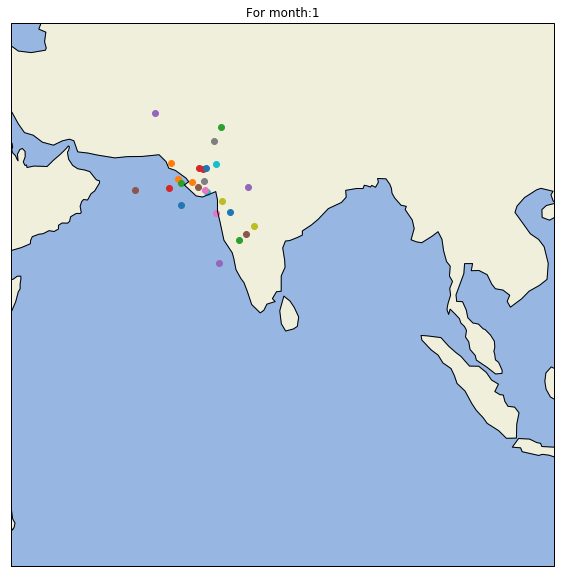

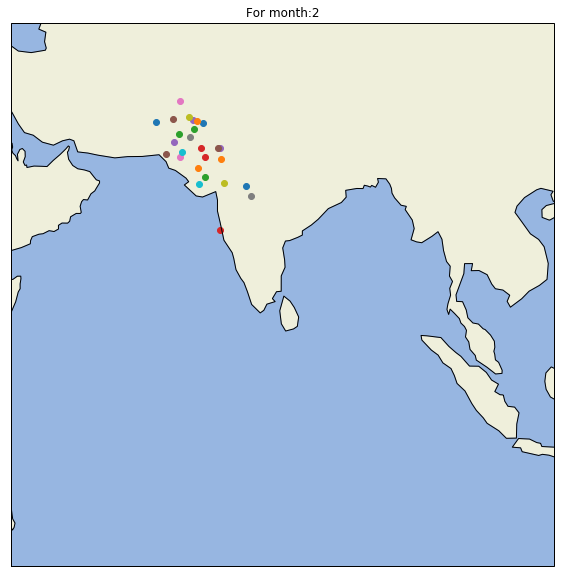

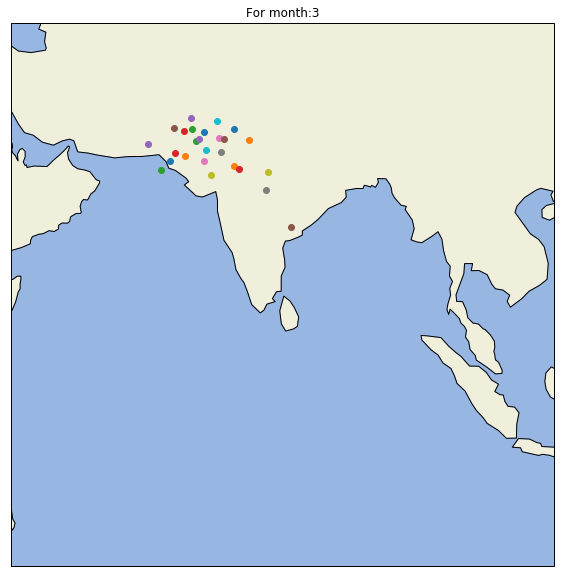

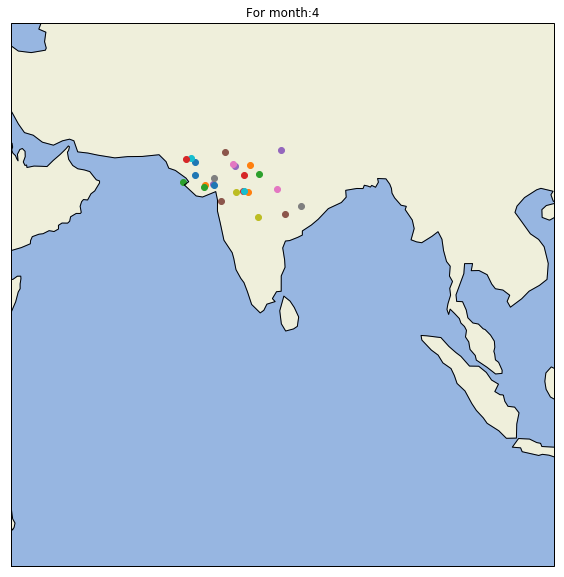

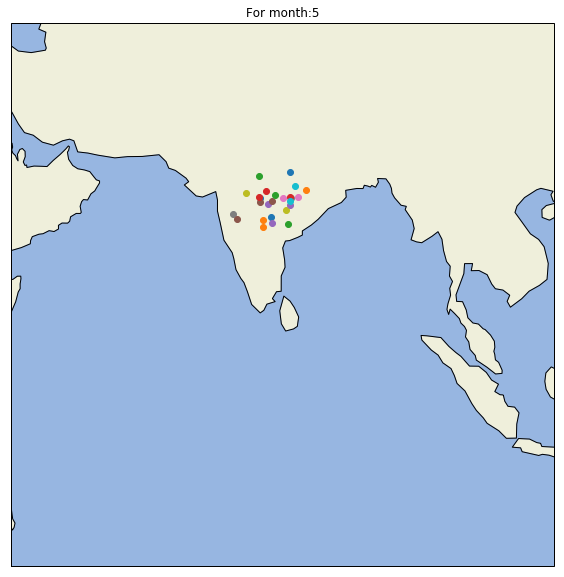

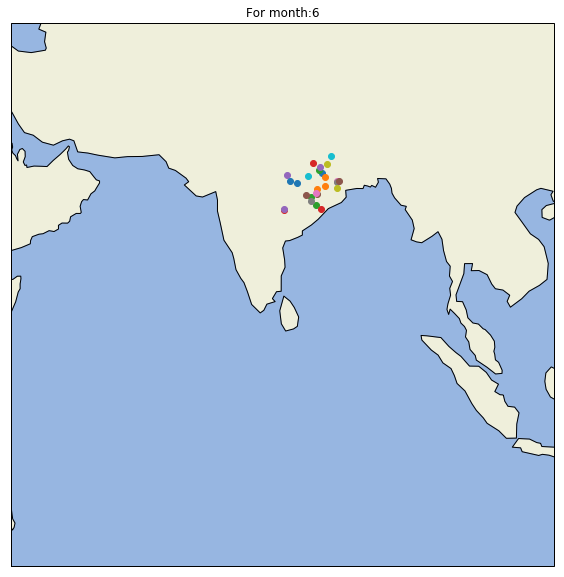

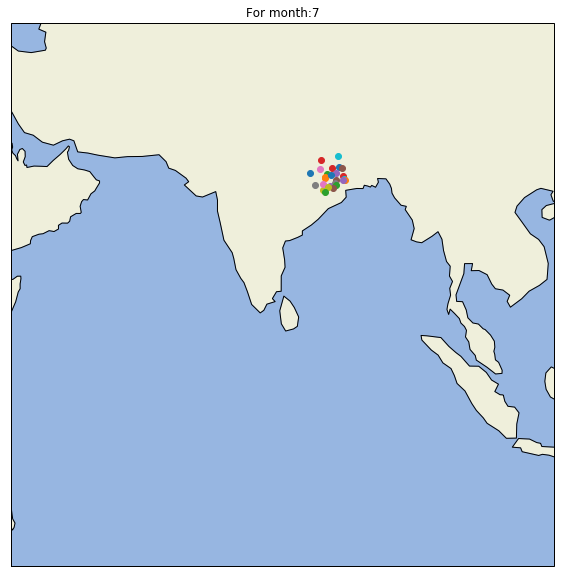

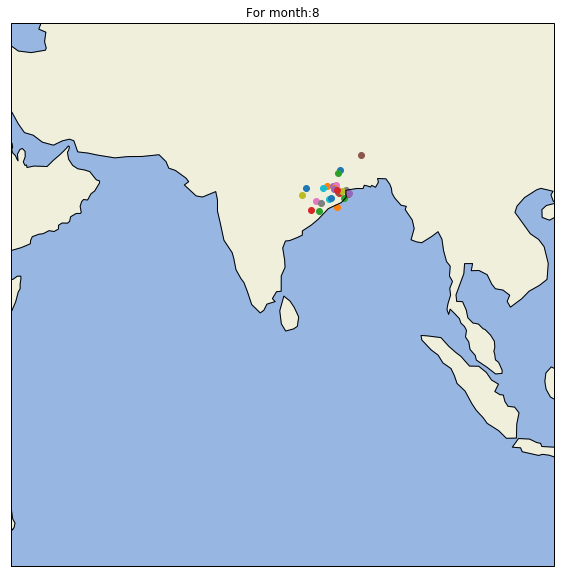

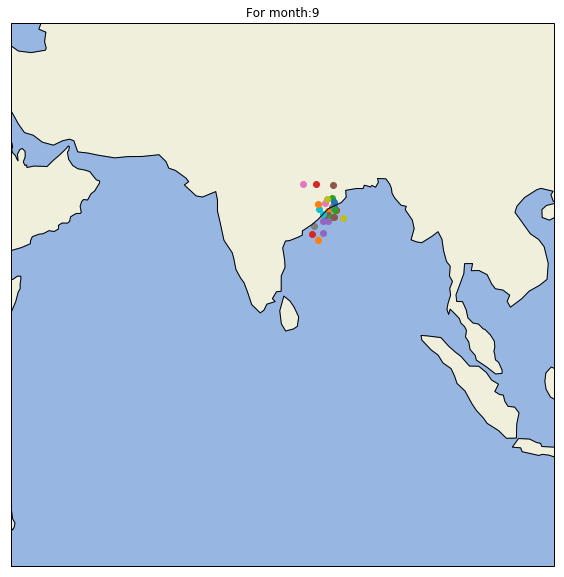

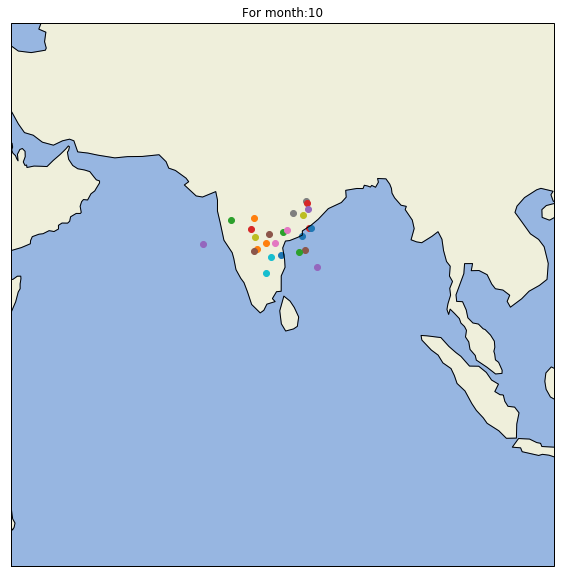

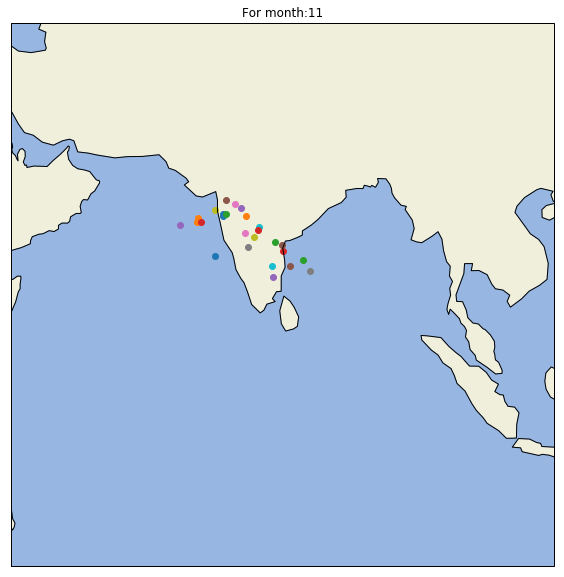

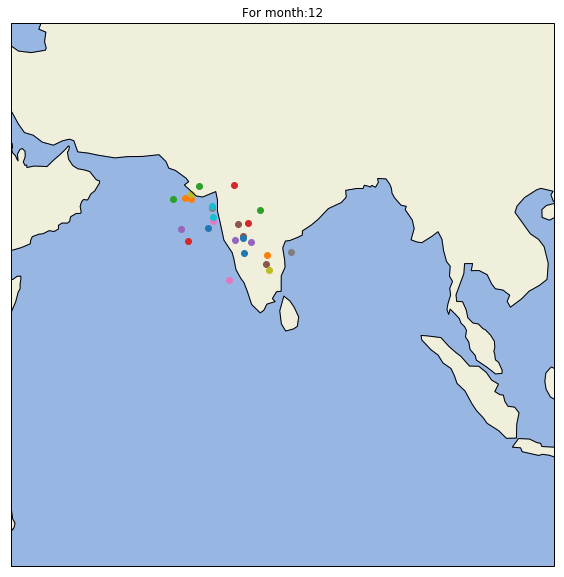

In [16]:
def make_figure():
    fig = plt.figure(figsize=(20, 10))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
    ax.add_feature(cfeat.LAND)
    ax.add_feature(cfeat.OCEAN)
    ax.add_feature(cfeat.COASTLINE)
    # ax.add_feature(cfeat.BORDERS, linestyle='dotted')
    return fig, ax


for j in range(12):    
    _, ax = make_figure()
    for i in range(j,len(x),12):
        plt.xlim(50,110)
        plt.ylim(-20,40)
        plt.scatter(x[i],y[i])
    plt.title("For month:" + str(j+1))
    plt.show()